In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
filepath = f"./good_reads_top_1000_books.csv"
df = pd.read_csv(filepath, nrows=1000)
df.head()

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads
0,To Kill a Mockingbird,Harper Lee,4.26,6129090,17358.0
1,1984,George Orwell,4.19,4604557,15474.0
2,Pride and Prejudice,Jane Austen,4.29,4273146,15135.0
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,10063128,12440.0
4,The Great Gatsby,F. Scott Fitzgerald,3.93,5244056,10828.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Name           1000 non-null   object 
 1   Author              1000 non-null   object 
 2   Average Rating      1000 non-null   float64
 3   Number of Ratings   1000 non-null   int64  
 4   Score on Goodreads  1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [92]:
df.nunique()

Book Name             1000
Author                 677
Average Rating         132
Number of Ratings      985
Score on Goodreads     530
dtype: int64

In [93]:
best_book = df.groupby('Author')['Average Rating'].max().reset_index()
best_book

,Author,Average Rating
0,A.G. Macdonell,3.67
1,A.L. Kennedy,3.40
2,A.S. Byatt,3.89
3,Agatha Christie,4.28
4,Ahdaf Soueif,3.81
...,...,...
672,Yaşar Kemal,4.48
673,Yevgeny Zamyatin,3.89
674,Zadie Smith,3.79
675,Zora Neale Hurston,3.98


In [94]:
best_book = df.merge(best_book, on=['Author', 'Average Rating'], how='inner')

In [95]:
top15_best_books = best_book[['Author', 'Book Name', 'Average Rating']].sort_values(by='Average Rating', ascending=False).head(15)
top15_best_books

,Author,Book Name,Average Rating
645,João Guimarães Rosa,The Devil to Pay in the Backlands,4.60
581,John Harris,Covenant With Death,4.57
99,Art Spiegelman,The Complete Maus,4.57
7,J.R.R. Tolkien,The Lord of the Rings,4.53
159,Larry McMurtry,"Lonesome Dove (Lonesome Dove, #1)",4.53
390,Jakub Lasak (Goodreads Author),A Modern Declaration of Independence: Crimes A...,4.52
256,Yaşar Kemal,"Memed, My Hawk (İnce Memed, #1)",4.48
3,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.47
314,Jack London,Martin Eden,4.47
340,Vasily Grossman,Life and Fate,4.45


In [96]:
top15_best_books['Author'] = top15_best_books['Author'].str.split('(').str[0]
top15_best_books

,Author,Book Name,Average Rating
645,João Guimarães Rosa,The Devil to Pay in the Backlands,4.60
581,John Harris,Covenant With Death,4.57
99,Art Spiegelman,The Complete Maus,4.57
7,J.R.R. Tolkien,The Lord of the Rings,4.53
159,Larry McMurtry,"Lonesome Dove (Lonesome Dove, #1)",4.53
390,Jakub Lasak,A Modern Declaration of Independence: Crimes A...,4.52
256,Yaşar Kemal,"Memed, My Hawk (İnce Memed, #1)",4.48
3,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.47
314,Jack London,Martin Eden,4.47
340,Vasily Grossman,Life and Fate,4.45


In [97]:
top15_best_books['Book Name'] = top15_best_books['Book Name'].str.split('(').str[0]
top15_best_books

,Author,Book Name,Average Rating
645,João Guimarães Rosa,The Devil to Pay in the Backlands,4.60
581,John Harris,Covenant With Death,4.57
99,Art Spiegelman,The Complete Maus,4.57
7,J.R.R. Tolkien,The Lord of the Rings,4.53
159,Larry McMurtry,Lonesome Dove,4.53
390,Jakub Lasak,A Modern Declaration of Independence: Crimes A...,4.52
256,Yaşar Kemal,"Memed, My Hawk",4.48
3,J.K. Rowling,Harry Potter and the Sorcerer's Stone,4.47
314,Jack London,Martin Eden,4.47
340,Vasily Grossman,Life and Fate,4.45


In [98]:
top15_best_books['Book Name short'] = top15_best_books['Book Name'].str.slice(0,20)+'...'
top15_best_books

,Author,Book Name,Average Rating,Book Name short
645,João Guimarães Rosa,The Devil to Pay in the Backlands,4.60,The Devil to Pay in ...
581,John Harris,Covenant With Death,4.57,Covenant With Death...
99,Art Spiegelman,The Complete Maus,4.57,The Complete Maus...
7,J.R.R. Tolkien,The Lord of the Rings,4.53,The Lord of the Ring...
159,Larry McMurtry,Lonesome Dove,4.53,Lonesome Dove ...
390,Jakub Lasak,A Modern Declaration of Independence: Crimes A...,4.52,A Modern Declaration...
256,Yaşar Kemal,"Memed, My Hawk",4.48,"Memed, My Hawk ..."
3,J.K. Rowling,Harry Potter and the Sorcerer's Stone,4.47,Harry Potter and the...
314,Jack London,Martin Eden,4.47,Martin Eden...
340,Vasily Grossman,Life and Fate,4.45,Life and Fate...


<Figure size 1400x600 with 0 Axes>

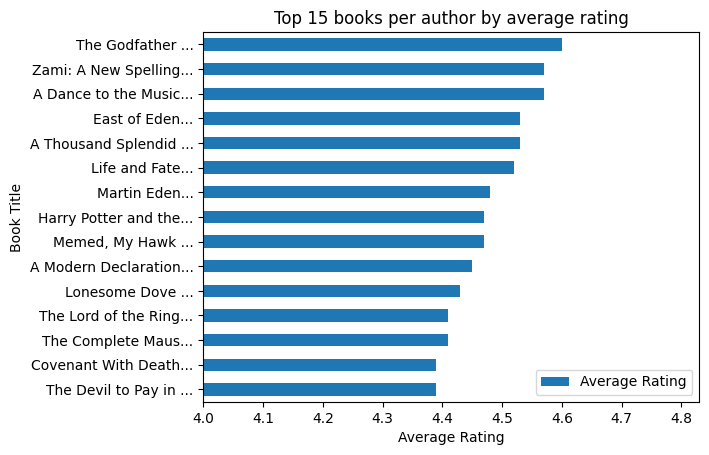

In [99]:
plt.figure(figsize=(14, 6))
ax = top15_best_books.sort_values(by='Average Rating', ascending=True).plot(kind='barh')
plt.xlim(4)
ax.set_yticklabels(top15_best_books['Book Name short'])

plt.title('Top 15 books per author by average rating')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')

plt.show()